In [1]:
import numpy as np
import pandas as pd

df_data = pd.read_csv("/kaggle/input/titanic/train.csv")
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# df_data.SibSp.value_counts()
# df_data.Parch.value_counts()
df_data.Ticket.value_counts()
# df_data.Cabin.value_counts()
# df_data.Embarked.value_counts()
# df_data.Age.value_counts()
# df_data.Fare.value_counts()
# df_data.PassengerId.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [3]:
# df_data[(df_data.Pclass==1) & (df_data.Survived==1)].count() #119
# df_data[(df_data.Pclass==2) & (df_data.Survived==1)].count() #87
# df_data[(df_data.Pclass==3) & (df_data.Survived==1)].count() #136
df_data[(df_data.Survived==1)].count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64

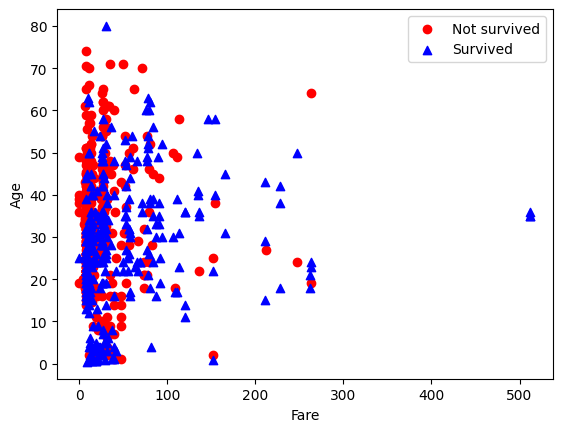

In [4]:
from matplotlib import pyplot as plt
plt.scatter(df_data.Fare[df_data.Survived==0],df_data.Age[df_data.Survived==0],c='red')
plt.scatter(df_data.Fare[df_data.Survived==1],df_data.Age[df_data.Survived==1],c='blue',marker='^')
plt.xlabel("Fare")
plt.ylabel("Age")
plt.legend(["Not survived", "Survived"])
plt.show()

# plt.scatter(df_data.Fare[df_data.Survived==0],df_data.Age[df_data.Survived==0],c='red')
# plt.scatter(df_data.Fare[df_data.Survived==1],df_data.Age[df_data.Survived==1],c='blue',marker='^')
# plt.xlabel("Fare")
# plt.ylabel("Age")
# plt.legend(["Not survived", "Survived"])
# plt.show()

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler 

X_train = df_data.drop(["Survived","PassengerId","Name","Ticket","Cabin","Sex","Embarked"],axis=1)
a = pd.get_dummies(df_data['Sex'], prefix='Sex')
b = pd.get_dummies(df_data['Embarked'], prefix='Embarked')
X_train = pd.concat([X_train, a, b], axis=1)

y_train = df_data.Survived
# X_train.shape, y_train.shape

# y_train
X_train = X_train.replace({True: 1, False: 0}).infer_objects(copy=False)
X_train

/tmp/ipykernel_18/4060817122.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace({True: 1, False: 0}).infer_objects(copy=False)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [6]:
nan_columns = X_train.columns[X_train.isnull().any()].tolist()
print(nan_columns)

['Age']


In [7]:
# 将NaN用中值替代
X_train.fillna(X_train.median(), inplace=True)

nan_columns = X_train.columns[X_train.isnull().any()].tolist()
print(nan_columns)

[]


In [8]:
from sklearn.preprocessing import StandardScaler 

Titanic_scaler = StandardScaler()
X_train= Titanic_scaler.fit_transform(X_train)
X_train.max(), X_train.min()

(9.667166525013505, -2.224156079948338)

In [9]:
import keras
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras全连接层
from keras.layers import Dropout #导入Dropout

ann = Sequential() #创建一个序贯ann模型
ann.add(Dense(units=10, input_dim=10, activation='relu')) # 添加输入层
ann.add(Dense(units=20, activation='relu')) # 添加隐层
ann.add(Dense(units=1, activation='sigmoid')) # 添加输出层
ann.summary()

2024-03-01 12:15:05.845938: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 12:15:05.846105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 12:15:06.021951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
ann.compile(optimizer='adam', # 优化器
           loss='binary_crossentropy', # 损失函数
           metrics=['acc']) # 评估指标

In [11]:
# 导入回调功能
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

# 设置回调功能
earlystop = EarlyStopping(monitor='val_acc',patience=20,verbose=1,restore_best_weights=True)
reducelr = ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,verbose=1,min_lr=1e-7)
modelckpt = ModelCheckpoint(filepath='ann.h5',monitor='val_acc',verbose=1,save_best_only=True,mode='max')

callbacks = [earlystop, reducelr, modelckpt]

history = ann.fit(X_train, y_train,
                 epochs=100, # 指定最大轮次
                 batch_size=96, # 指定批量大小
                 callbacks=callbacks) # 指定回调功能

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.7249 - acc: 0.3614 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6990 - acc: 0.4557 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6757 - acc: 0.6364 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6540 - acc: 0.6869 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6337 - acc: 0.7194 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6127 - acc: 0.7396 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5914 - acc: 0.7531 - lr: 0.0010
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5703 - acc: 0.7643 - lr: 0.0010
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5484 - acc: 0.7666 - lr: 0.0010
Epoch 10/100
10/10 [=================

In [12]:
y_pred = ann.predict(X_train)
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)
y_pred = np.round(y_pred)
y_comparision = np.append(y_pred, y_train, axis=1)
df_comparision = pd.DataFrame(y_comparision, columns=['Predicted', 'Actual'])
df_comparision.head()

28/28 [==============================] - 0s 1ms/step


,Predicted,Actual
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,0.0


In [13]:
df_test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

X_test = df_test_data.drop(["PassengerId","Name","Ticket","Cabin","Sex","Embarked"],axis=1)
a = pd.get_dummies(df_test_data['Sex'], prefix='Sex')
b = pd.get_dummies(df_test_data['Embarked'], prefix='Embarked')
X_test = pd.concat([X_test, a, b], axis=1)

X_test

# 清除NaN
X_test.fillna(X_test.median(), inplace=True)
nan_columns = X_test.columns[X_test.isnull().any()].tolist()
# print(nan_columns)

# 规范化
X_test= Titanic_scaler.fit_transform(X_test)
X_test.max(), X_test.min()

# 预测
y_pred = ann.predict(X_test)
y_pred = np.round(y_pred)
y_pred = y_pred.astype(int)
df_pred = pd.DataFrame(y_pred)
passengerId = df_test_data['PassengerId']
result = [passengerId,df_pred]
df_result = pd.concat(result, axis=1)
df_result.columns = ['PassengerId', 'Survived']
df_result

df_result.to_csv('/kaggle/working/submission.csv', index=False)

14/14 [==============================] - 0s 2ms/step


In [14]:
final_result = pd.read_csv("/kaggle/working/submission.csv")
final_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
